In [1]:
import pandas as pd
import numpy as np

In [4]:
train_df = pd.read_csv('data/train.txt', sep=';', header=None)
train_df

,0,1
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


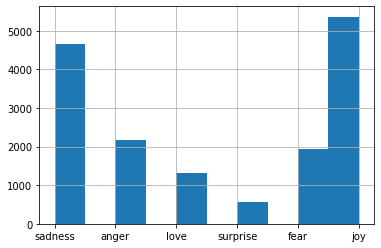

In [5]:
train_df[1].hist()

In [6]:
test_df = pd.read_csv('data/test.txt', sep=';', header=None)

In [7]:
train_df[1].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [9]:
train_sentences = train_df[0].values.T
train_sentences[:10]

array(['i didnt feel humiliated',
       'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
       'im grabbing a minute to post i feel greedy wrong',
       'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
       'i am feeling grouchy',
       'ive been feeling a little burdened lately wasnt sure why that was',
       'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
       'i feel as confused about life as a teenager or as jaded as a year old man',
       'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
       'i feel romantic too'], dtype=object)

In [10]:
train_labels = train_df[1].values.T
train_labels[:10]

array(['sadness', 'sadness', 'anger', 'love', 'anger', 'sadness',
       'surprise', 'fear', 'joy', 'love'], dtype=object)

In [11]:
encoder = LabelEncoder()
training_labels_final = encoder.fit_transform(train_labels)
training_labels_final[:10]

array([4, 4, 0, 3, 0, 4, 5, 1, 2, 3])

In [12]:
test_sentences = test_df[0].values.T
test_sentences[:10]

array(['im feeling rather rotten so im not very ambitious right now',
       'im updating my blog because i feel shitty',
       'i never make her separate from me because i don t ever want her to feel like i m ashamed with her',
       'i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived',
       'i was feeling a little vain when i did this one',
       'i cant walk into a shop anywhere where i do not feel uncomfortable',
       'i felt anger when at the end of a telephone call',
       'i explain why i clung to a relationship with a boy who was in many ways immature and uncommitted despite the excitement i should have been feeling for getting accepted into the masters program at the university of virginia',
       'i like to have the same breathless feeling as a reader eager to see what will happen next',
       'i jest i feel grumpy tired and pre menstrual which i probably am but then again its only been a week and im abo

In [13]:
test_labels = test_df[1].values.T
test_labels[:10]

array(['sadness', 'sadness', 'sadness', 'joy', 'sadness', 'fear', 'anger',
       'joy', 'joy', 'anger'], dtype=object)

In [14]:
testing_labels_final = encoder.transform(test_labels)
testing_labels_final[:10]

array([4, 4, 4, 2, 4, 1, 0, 2, 2, 0])

In [15]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [16]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 171,878
Trainable params: 171,878
Non-trainable params: 0
_________________________________________________________________


In [17]:
num_epochs = 11
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/11
500/500 [==============================] - 14s 27ms/step - loss: 1.3243 - accuracy: 0.4728 - val_loss: 0.6989 - val_accuracy: 0.7555
Epoch 2/11
500/500 [==============================] - 16s 32ms/step - loss: 0.4110 - accuracy: 0.8635 - val_loss: 0.3424 - val_accuracy: 0.8925
Epoch 3/11
500/500 [==============================] - 16s 33ms/step - loss: 0.2085 - accuracy: 0.9296 - val_loss: 0.2594 - val_accuracy: 0.9040
Epoch 4/11
500/500 [==============================] - 17s 33ms/step - loss: 0.1333 - accuracy: 0.9498 - val_loss: 0.2591 - val_accuracy: 0.9040
Epoch 5/11
500/500 [==============================] - 17s 34ms/step - loss: 0.1098 - accuracy: 0.9602 - val_loss: 0.2790 - val_accuracy: 0.9025
Epoch 6/11
500/500 [==============================] - 18s 35ms/step - loss: 0.0871 - accuracy: 0.9665 - val_loss: 0.2641 - val_accuracy: 0.9115
Epoch 7/11
500/500 [==============================] - 18s 37ms/step - loss: 0.0879 - accuracy: 0.9671 - val_loss: 0.2825 - val_accuracy:

In [18]:
model.save('emotions-classification-new')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: emotions-classification-new\assets


In [41]:
model = tf.keras.models.load_model('/content/drive/My Drive/HowdyHack2020/emotions-classification')

In [39]:
val_df = pd.read_csv('/content/val.txt', sep=';', header=None)
val_df[val_df[1] == 'surprise'].iat[1, 0]

'im feeling a little dazed at the amount of items that i no longer use for decorations'

In [40]:
my_input = ['im feeling a little dazed at the amount of items that i no longer use for decorations']#val_df[0].values.T[:5]

input_seq = tokenizer.texts_to_sequences(my_input)
input_padded = pad_sequences(input_seq, maxlen=max_length)

encoder.inverse_transform(np.argmax(model.predict(input_padded), axis=1))

array(['surprise'], dtype=object)